In [1]:
import matplotlib.pyplot as plt
from models.mini_sia import SIA, TUnit, TUnits
import models.mini_sia
from typing import Tuple
import numpy as np
from PIL import Image, ImageOps

%matplotlib inline

In [2]:
def aplanar(matriz):
    bitstring = ''
    for k in range(len(matriz)):
        for w in range(len(matriz[k])):
            bitstring += ''.join([str(int(matriz[k][w][0]))])
    return bitstring

In [3]:
digits = ['0','1','2','3','4','6','punto','9']
inp = []
for num in digits:
    inp.append(plt.imread('digits/'+num+'.png'))
for i in range(len(inp)):
    inp[i] = aplanar(inp[i])

In [4]:
antigens =  inp

In [5]:
def format_image(bitstring):
    img = []
    nexti = 0
    for i in range(0, len(bitstring), 12):
        nexti += 12
        row = bitstring[i: nexti]
        img.append(list(map(int, row)))
    return img

In [6]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()    

In [7]:
def hamming_func(s1: TUnit, s2: TUnit) -> float:
    summation = 0
    for a, b in zip(s1, s2):
        summation += a != b
    return 120 - summation


In [12]:
sib = SIA(120, 10)
sib.units =  sib.bone_marrow_binary(10, 120)
sib.clonalg(hamming_func, antigens, 5, 0, 1000)

{'000000000000000111111000001111111100011110011110011110011110011110011110011110011110001111111100000111111000000000000000': '001100011000000010010001010101001101000110001110110110110000110001010110100011001110010101111111100000111010110000100101',
 '000011110000000011110000000011110000000011110000000011110000000011110000000011110000000011110000000011110000000011110000': '000001001100111010110100001010001100100011111010110001001110100010010001001000011001110101100100000111110011000110101110',
 '111111111000111111111000000000011000000000011000111111111000111111111000111000000000111000000000111111111000111111111000': '010010111111111101101000010111011000000010111100010011111101111000001110011001001000011110011000000011011110010101101001',
 '001111111100001111111110000000000110000000000110000011111100000011111100000000000110000000000110001111111110001111111100': '001001100111101010110001111110000111001010100000100011101111001101001101010111011100010001010111000110101110100011111100',
 '01

In [9]:
def show_memories(memory):
    images = []
    for key in memory:
        images += [format_image(memory[key])]
    titles = ['0', '1', '2', '3', '4', '6', '7', '9']
    memories = dict(zip(titles, images))
    display_multiple_img(memories,1, 8)

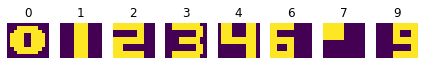

In [10]:
titles = ['0', '1', '2', '3', '4', '6', '7', '9']
show_memories(dict(zip(titles, antigens)))

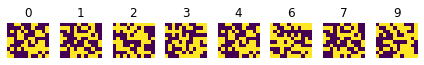

In [13]:
show_memories(sib.memory)
